In [1]:
# import required packages
import pandas as pd
import numpy as np
import scipy
from outliers import smirnov_grubbs as grubbs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# With original command, there was an error utf-8' codec can't decode byte 0xa0 in position 4: invalid start byte
# To fix this , we ll use additional "encoding="ISO-8859-1"
df = pd.read_csv('nba_ht_wt.csv', encoding="ISO-8859-1")

In [9]:
df.head()

,Player,Pos,Height,Weight,Age
0,Nate Robinson,G,69,180,29
1,Isaiah Thomas,G,69,185,24
2,Phil Pressey,G,71,175,22
3,Shane Larkin,G,71,176,20
4,Ty Lawson,G,71,195,25


In [11]:
#What is data
type(df)

pandas.core.frame.DataFrame

In [12]:
df.mean()

Height     79.065347
Weight    220.673267
Age        26.190099
dtype: float64

In [3]:
# Separating height variable to see its details. Or for use for future regression
height=df['Height']
# The same could be used to rename columns.
height

0      69
1      69
2      71
3      71
4      71
5      71
6      72
7      72
8      72
9      72
10     72
11     72
12     72
13     72
14     72
15     72
16     72
17     72
18     72
19     73
20     73
21     73
22     73
23     73
24     73
25     73
26     73
27     73
28     73
29     73
       ..
475    84
476    84
477    84
478    84
479    84
480    84
481    84
482    84
483    84
484    84
485    84
486    84
487    84
488    84
489    84
490    84
491    84
492    84
493    84
494    84
495    84
496    85
497    85
498    85
499    85
500    85
501    85
502    85
503    86
504    87
Name: Height, Length: 505, dtype: int64

In [4]:
# Extra check for data type. Now it is no more dataframe. It has become a series. So, do not do pd. * like stuff
type(height)

pandas.core.series.Series

In [15]:
height.mean()
#just confirming what we got above.

79.06534653465347

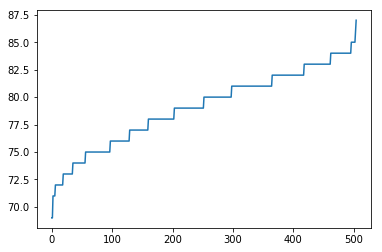

In [16]:
#Ok. Now we need to see this alone variable height.We ll plot this lonely ranger.
plt.plot(height)
#if this does not work then we can also add "plt.show()" .

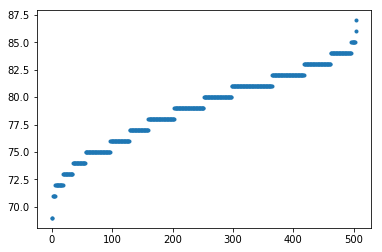

In [17]:
# This last graphy looks very contineous. We need to see points. So, try this one
plt.plot(height,'.')
# This looks like stairs.

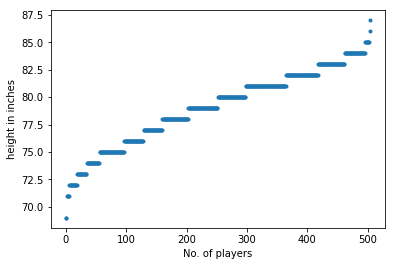

In [20]:
# Always label your graph to know what is happening
plt.ylabel('height in inches')
plt.xlabel('No. of players')
# Please add this command again. Now x and y labels are done.
plt.plot(height,'.')

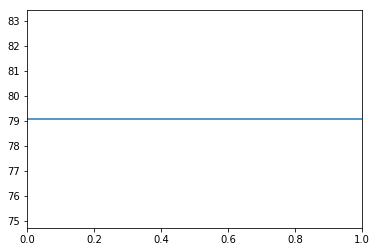

In [21]:
# To draw average line and see where it touches
plt.axhline(y=height.mean())

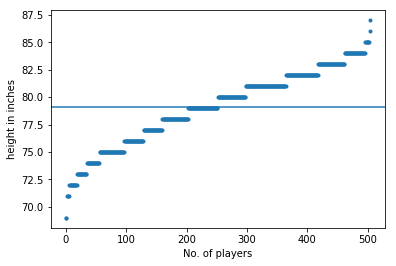

In [22]:
# Add this to previous commands. As incomplete result was shown
plt.ylabel('height in inches')
plt.xlabel('No. of players')
plt.axhline(y=height.mean())
plt.plot(height,'.')

# Now for Regression, we have two steps
#Simple linear reg is comparison of two models
#1.Where indep variable does not exist
#2.best fit reg line
WE will do first stel. For that, we ll calculate "Sum of Squared Errors" of variable "Height" i.e dep variable.

In [23]:
# check what is mean height
height.mean()

79.06534653465347

In [24]:
# 79 is mean height. We need to see difference of player at index 0 in our dataset. First value is 69.So,
diff_player1= 69-height.mean()
diff_player1

-10.065346534653472

In [25]:
# But this value is not mean. We need to take square of it to get sum of squre of player1
ssm_players1=diff_player1*diff_player1
ssm_players1

101.31120086266066

In [ ]:
# We have only calculated for player1 . We can calculate all night for 505 players. Or, we be smart.
average=height.mean()
diff_loop= [average- h for h in height]
# here we have applied a loop for height of all players
diff_loop

In [30]:
# check if all players are included i.e 505
len(diff_loop)

505

In [ ]:
# This was for difference. We need sum of square. So, we ll do that
diffsq_loop=[num*num for num in diff_loop]
diffsq_loop

In [35]:
#again check if all players are included i.e 505
len(diffsq_loop)

505

In [49]:
# Final stage of our 1st step is sum of square
sse=sum(diffsq_loop)
sse

6012.843564356443

# Now Step 2: Best fit reg line

In [ ]:
# separate variable weight and rename weights.Now it is series instead of dataframe. 
weights=df['Weight']
weights

In [39]:
type(weights)

pandas.core.series.Series

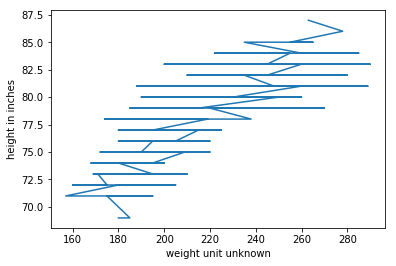

In [40]:
# ploting weight as x and height as y
plt.ylabel('height in inches')
plt.xlabel('weight unit unknown')
plt.plot(weights, height)

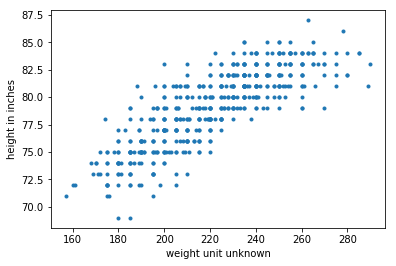

In [42]:
plt.ylabel('height in inches')
plt.xlabel('weight unit unknown')
plt.plot(weights, height,'.')
# As plot looks like jumanji so we used other one. this plot looks reasonable. 

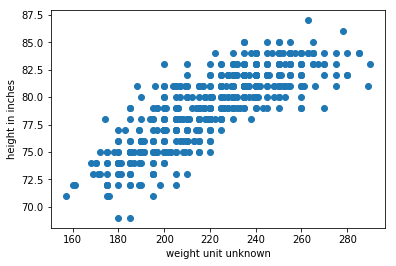

In [41]:
# OR, we ll try scatterplot
plt.ylabel('height in inches')
plt.xlabel('weight unit unknown')
plt.scatter(weights, height)

In [43]:
#By looking at plot, we can observe a linear relation
#Lets check corelation
np.corrcoef(weights, height)

array([[1.        , 0.82071923],
       [0.82071923, 1.        ]])

In [47]:
#Instead of doing a long math. Use numpy. We ll write first "X" i.e weight and then "Y" i.e height
fit=np.polyfit(weights, height , 1)
fit
# First value is slope, second is y-int.This gives us best fitting line

array([ 0.10639822, 55.58610324])

In [48]:
# for checking prediction
pred_height=np.poly1d(fit)
#lets say new players' height is 200. So,
pred_height(200)

76.8657476477589

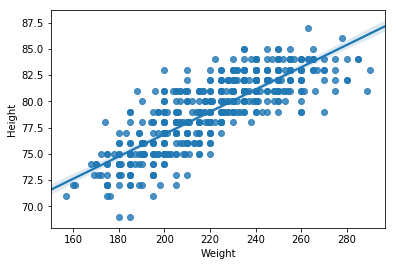

In [50]:
# Time to plot regression plot using seaborn
sns.regplot(weights, height)

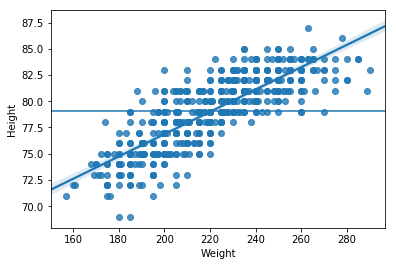

In [52]:
# Checking with mean height to see how much was diff. in average height prediction vs our prediction
plt.ylabel('height in inches')
plt.xlabel('No. of players')
plt.axhline(y=height.mean())

sns.regplot(weights, height)

In [ ]:
# Next is a methods to calcultae R.sq by find SSE, SST and SSR. Short method is yet to be found .....